# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [384]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
import cv2                                                                                       # Importing cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
from keras import layers
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [385]:
# Load image file of the dataset
images = np.load("D:/AIML UT AUSTIN/Introduction to Computer Vision/Project5/images.npy")

# Load the labels file of the dataset
labels = pd.read_csv("D:/AIML UT AUSTIN/Introduction to Computer Vision/Project5/Labels.csv")

## Data Overview

### Understand the shape of the dataset

In [386]:
images.shape

(4750, 128, 128, 3)

* Total 4750 images are there of Shape 128*128 and 3 channel

In [387]:
labels.shape

(4750, 1)

In [388]:
# Create copy of data 
images_bgr = images.copy()

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [389]:
def plot_images(images, labels):
  num_classes = 12
  categories = np.unique(labels)
  keys = dict(labels['Label'])
  rows = 5
  cols = 5
  fig = plt.figure(figsize=(12,16))
  for i in range(cols):
    for j in range(rows):
      random_index = np.random.randint(0, len(images))
      ax = fig.add_subplot(rows, cols, i * rows + j + 1)
      ax.imshow(images[random_index, :])
      ax.set_title(keys[random_index])
  plt.show()


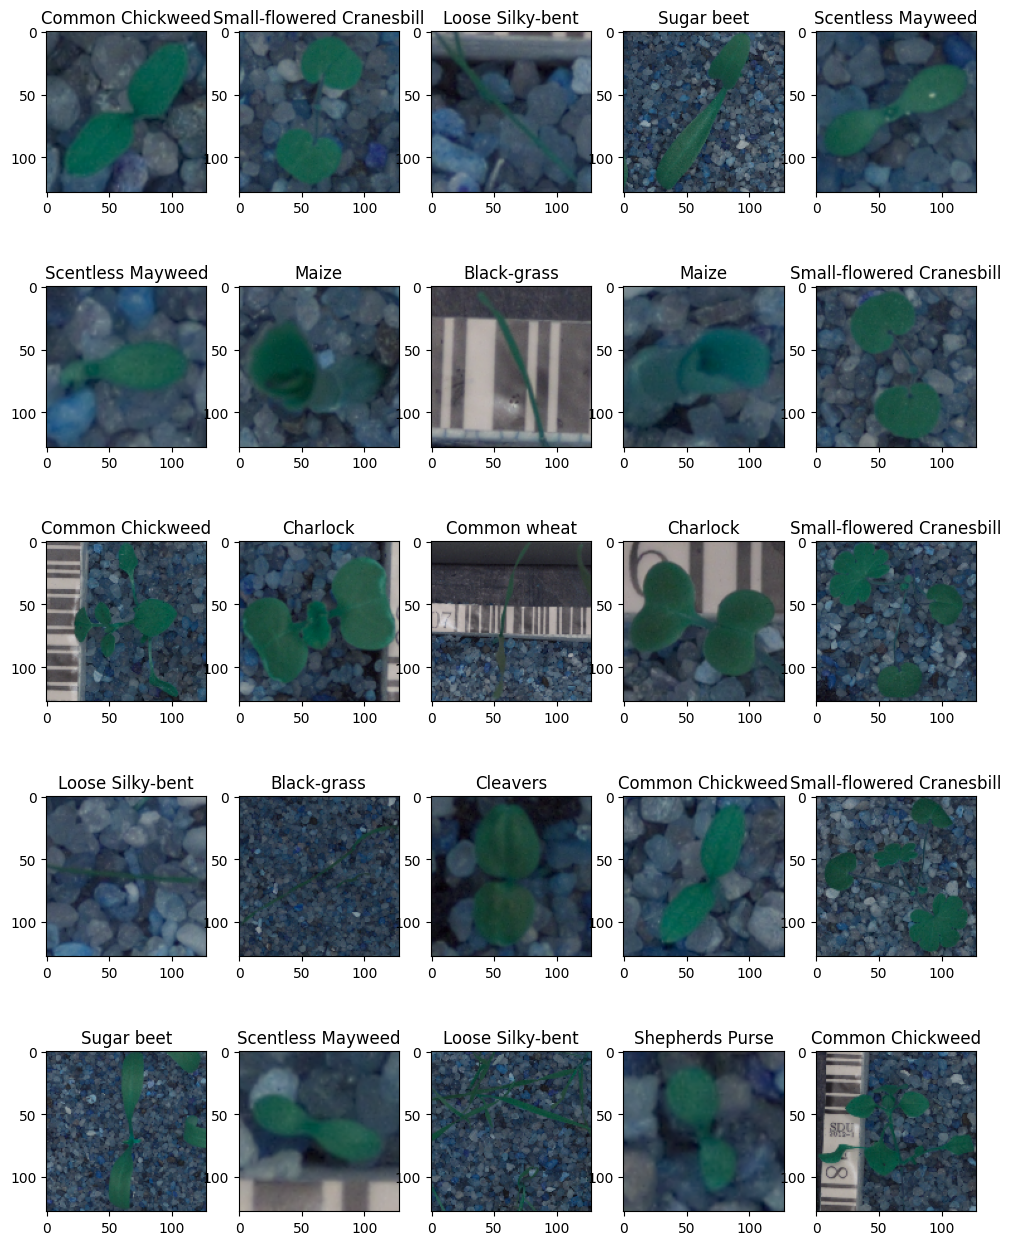

In [390]:
plot_images(images_bgr, labels)

##### Checking data imbalance

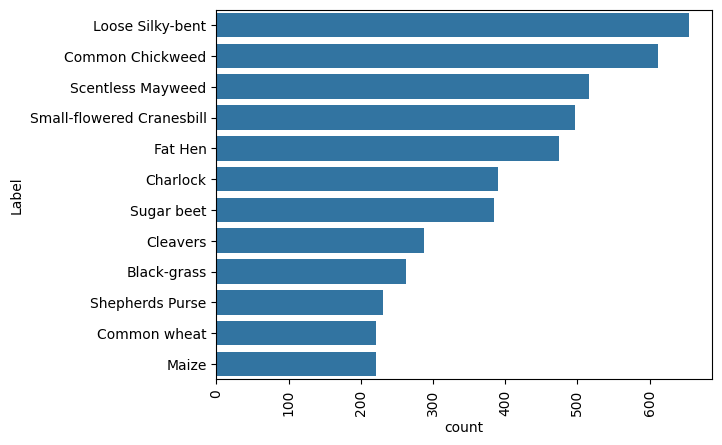

In [391]:
order = labels['Label'].value_counts().index
sns.countplot(labels['Label'], order=order)
plt.xticks(rotation=90)
plt.show()

* As we can see data has variations in counts of plant species. But we have sufficients counts to train the model

## Data Pre-Processing

#### Convert the BGR images to RGB images

In [392]:
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

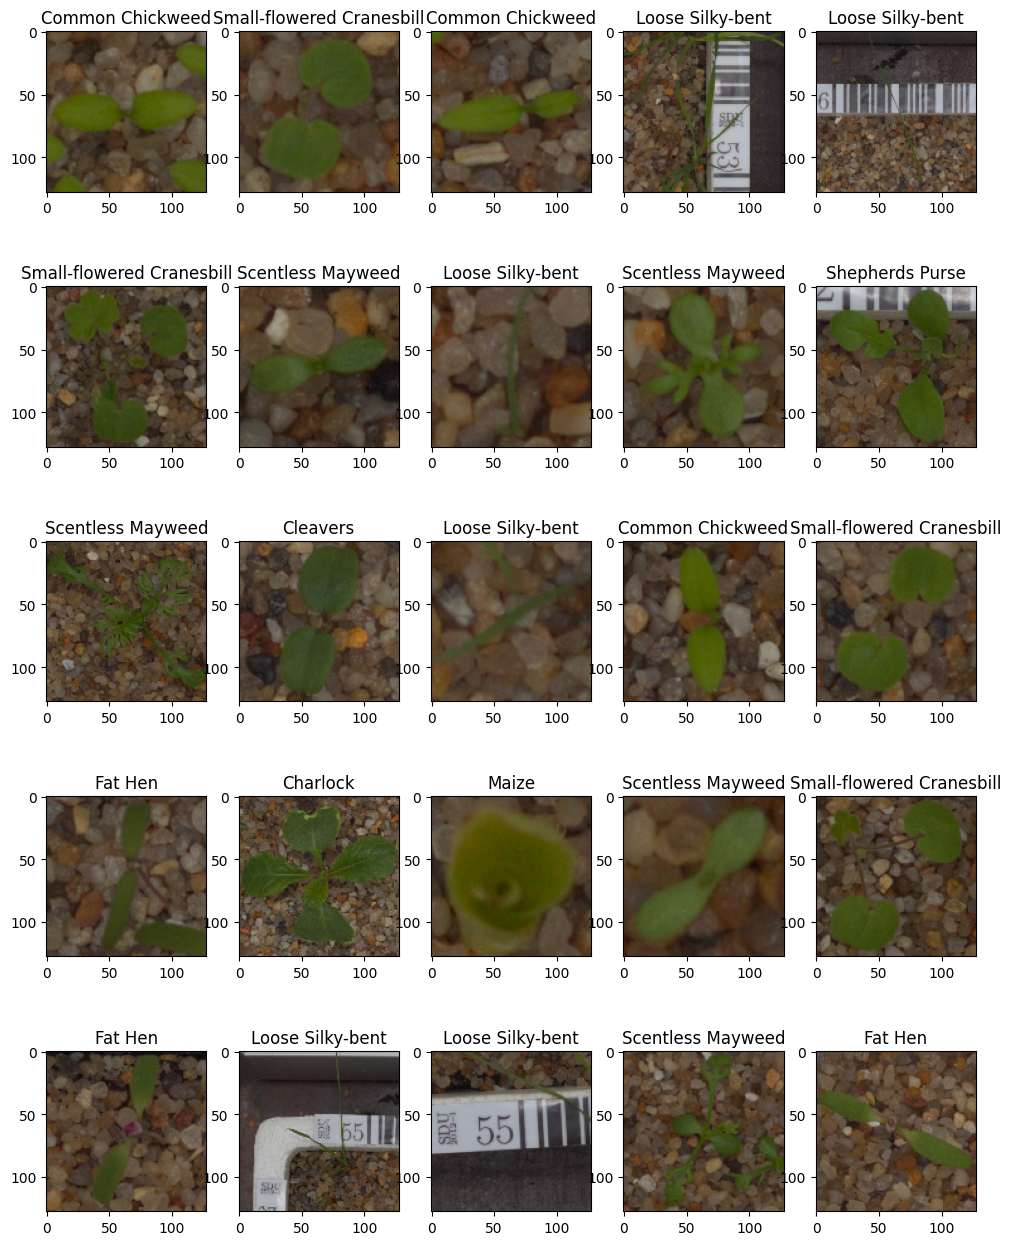

In [395]:
# Plot images after BGR to RGB for better understanding
plot_images(images, labels)

#### Resize the images

In [396]:
# Resize images to 128*128 so as to keep the quality of images and make sure have same size images in data
images_resized=[]
height = 128                   # Complete the code to define the height as 128
width =  128                    # Complete the code to define the width as 128
dimensions = (width, height)
for i in range(len(images)):
  images_resized.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

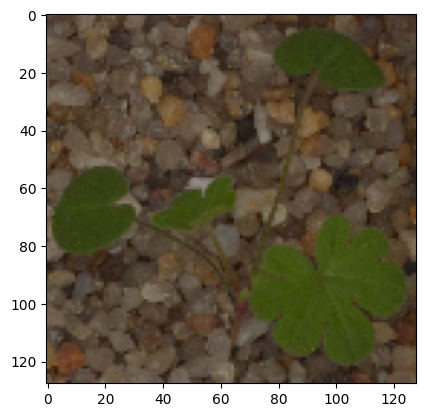

In [397]:
plt.imshow(images_resized[30])

In [398]:
images.shape

(4750, 128, 128, 3)

##### Apply image processing on the images* Cconvert image from RGB to HSV
* 
Applymasking for images
* Apply Segmentation
* Apply Sharpeninging

In [399]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp


In [400]:
# put all those functions together.
def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen

##### Itrate on all images

In [401]:
# and `images_resized` is a list of resized images
# Initialize an empty list to store processed images
processed_data_color = []

# Iterate through the images
for indx, image in enumerate(images_resized):
    try:
        # Process the image using the segment function
        processed_image = segment(image)
        
        # Append the processed image to the array
        processed_data_color.append(processed_image)
    
    except Exception as e:
        # Print the index and error details for debugging
        print(f"Error processing image at index {indx}: {e}")
        continue

# Convert the list to a NumPy array for further processing if needed
import numpy as np
processed_data_color = np.array(processed_data_color)

      

In [402]:
processed_data_color.shape

(4750, 128, 128, 3)

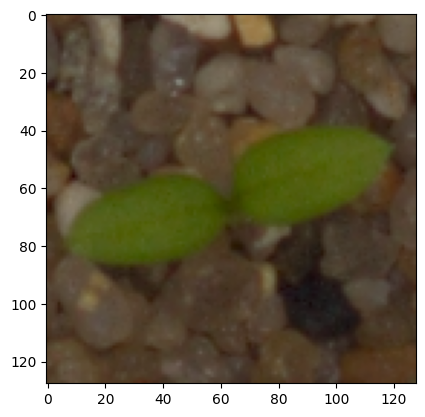

In [403]:
plt.imshow(images[2000])

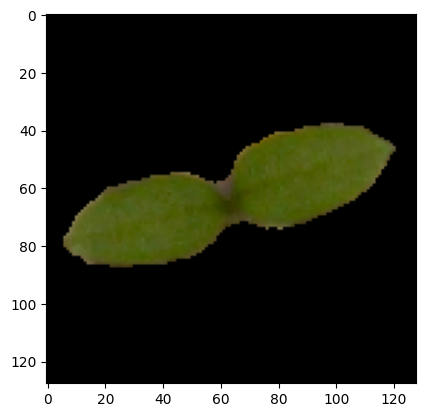

In [404]:
plt.imshow(processed_data_color[2000])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

#### Split the dataset

In [405]:
X_temp, X_test, y_temp, y_test = train_test_split(processed_data_color, labels, test_size=0.1, random_state=42, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)


In [406]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 128, 128, 3) (3847, 1)
(428, 128, 128, 3) (428, 1)
(475, 128, 128, 3) (475, 1)


#### Encode the target labels

In [407]:
# Convert labels from names to one hot vectors.
lb = LabelBinarizer()
y_train_encoded = lb.fit_transform(y_train)
y_val_encoded=lb.transform(y_val)
y_test_encoded=lb.transform(y_test)

In [408]:
y_train_encoded.shape

(3847, 12)

In [409]:
y_val_encoded.shape

(428, 12)

In [410]:
y_test_encoded.shape

(475, 12)

#### Data Normalization

In [411]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

#### Model 0 - Base Model with Convolution and Pulling layers

In [423]:
# Clearing Backend
from tensorflow.keras import backend
backend.clear_session()
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [424]:
# Initializing a sequential model
model = Sequential()

# Adding first conv layer with 128 filters and Kernel size 3*3, padding 'same'
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2)))

# Add two convolution and max-pooling layers activation = relu
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,548 (943.55 KB)

 Trainable params: 241,548 (943.55 KB)

 Non-trainable params: 0 (0.00 B)

##### Fitting the model on training data

In [425]:
history = model.fit(
    train_datagen1.flow(X_train_normalized, y_train_encoded, seed=42, shuffle=True),
    epochs=40,
    validation_data=(X_val_normalized, y_val_encoded),
    batch_size=32,
    verbose=2)

Epoch 1/40
121/121 - 13s - 106ms/step - accuracy: 0.2880 - loss: 2.1164 - val_accuracy: 0.4252 - val_loss: 1.6812
Epoch 2/40
121/121 - 11s - 94ms/step - accuracy: 0.4268 - loss: 1.6503 - val_accuracy: 0.4836 - val_loss: 1.4830
Epoch 3/40
121/121 - 12s - 97ms/step - accuracy: 0.4931 - loss: 1.4285 - val_accuracy: 0.5304 - val_loss: 1.3171
Epoch 4/40
121/121 - 12s - 97ms/step - accuracy: 0.5529 - loss: 1.2550 - val_accuracy: 0.5701 - val_loss: 1.2039
Epoch 5/40
121/121 - 12s - 99ms/step - accuracy: 0.5851 - loss: 1.1478 - val_accuracy: 0.6192 - val_loss: 1.0820
Epoch 6/40
121/121 - 12s - 98ms/step - accuracy: 0.6296 - loss: 1.0271 - val_accuracy: 0.7126 - val_loss: 0.8760
Epoch 7/40
121/121 - 11s - 94ms/step - accuracy: 0.6652 - loss: 0.9314 - val_accuracy: 0.7407 - val_loss: 0.7630
Epoch 8/40
121/121 - 11s - 93ms/step - accuracy: 0.7091 - loss: 0.8156 - val_accuracy: 0.6939 - val_loss: 0.8779
Epoch 9/40
121/121 - 11s - 92ms/step - accuracy: 0.7408 - loss: 0.7504 - val_accuracy: 0.7593 -

##### Plot Accuracy graph

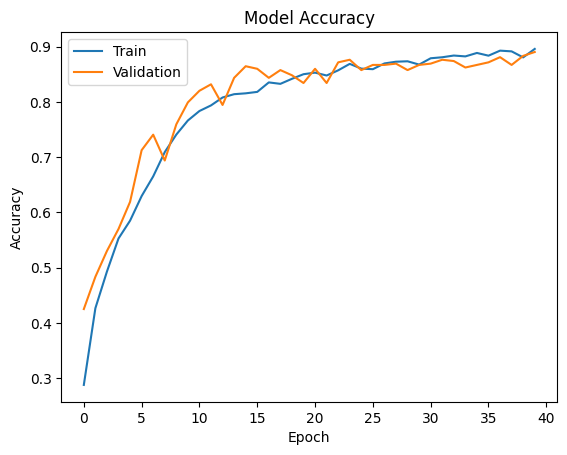

In [427]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##### Evaluate the model on Test Data

In [428]:
test_accuracy0 = model.evaluate(X_test_normalized, y_test_encoded, verbose=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8846 - loss: 0.4190


* Model is giving around 89% accuracy on Training and Validation set and around 88% on test set
* Model is generalizing well on data

##### Generating Predictions on Test Data

In [429]:
y_pred = model.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


##### Plot Confusion Matrix

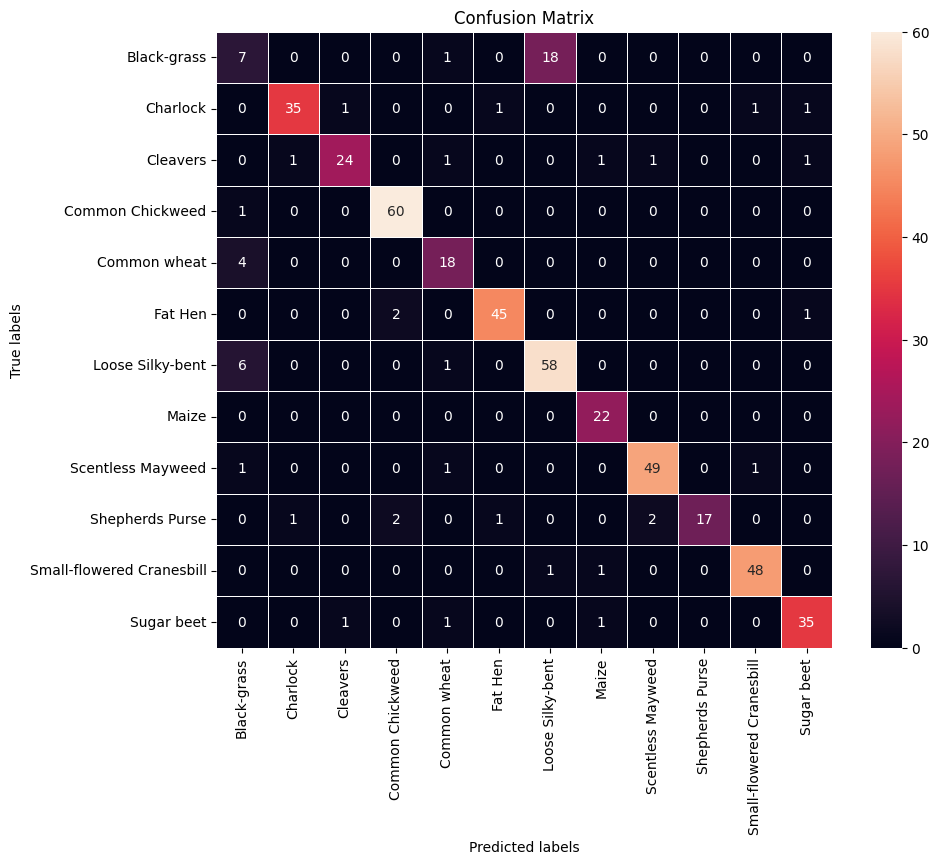

In [430]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(lb.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(lb.classes_),rotation=0)
plt.show()

In [431]:
# Plotting Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_arg, y_pred_arg, target_names=list(lb.classes_)))

                           precision    recall  f1-score   support

              Black-grass       0.37      0.27      0.31        26
                 Charlock       0.95      0.90      0.92        39
                 Cleavers       0.92      0.83      0.87        29
         Common Chickweed       0.94      0.98      0.96        61
             Common wheat       0.78      0.82      0.80        22
                  Fat Hen       0.96      0.94      0.95        48
         Loose Silky-bent       0.75      0.89      0.82        65
                    Maize       0.88      1.00      0.94        22
        Scentless Mayweed       0.94      0.94      0.94        52
          Shepherds Purse       1.00      0.74      0.85        23
Small-flowered Cranesbill       0.96      0.96      0.96        50
               Sugar beet       0.92      0.92      0.92        38

                 accuracy                           0.88       475
                macro avg       0.86      0.85      0.85    

##### Comments

* Recall is very low for other classes recall is good* 
Precision is low for Black grass but all other classes have good preicision and f1 score* 
Even from confusion matrix, we see model did not perform well for black gra, it is misclassifying black grass as loose silky bent
* Let's see if we can improve performance furtherher 

## Model Performance Improvement

### Model 1  - Model with Data Augmentation

#### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

* As we can see, our initial model appears to be not fitting well. Therefore we'll try to address this problem with data augmentation to check if we can improve the model's performance.

In [446]:
# set the rotation_range to 20
train_datagen1 = ImageDataGenerator(rotation_range=20,  # randomly rotate images in the range
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )

Let's clear the previous model history and set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow to be able to reproduce the same results every time we run the code.

In [447]:
# Clearing Backend
from tensorflow.keras import backend
backend.clear_session()
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [448]:
# Initializing a sequential model
model1 = Sequential()

# Adding first conv layer with 128 filters and Kernel size 3*3, padding 'same'
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2)))

# Add two convolution and max-pooling layers activation = relu
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.4))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147,404 (575.80 KB)

 Trainable params: 147,404 (575.80 KB)

 Non-trainable params: 0 (0.00 B)

In [449]:
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=0.0001, restore_best_weights=True)

##### Fitting the model on train data

In [450]:
history = model1.fit(
    train_datagen1.flow(X_train_normalized, y_train_encoded, seed=42, shuffle=True),
    epochs=60,
    validation_data=(X_val_normalized, y_val_encoded),
    batch_size=32,
    verbose=1,
    callbacks=[callback_es])

Epoch 1/60
121/121 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.1673 - loss: 2.3368 - val_accuracy: 0.3224 - val_loss: 1.9645
Epoch 2/60
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.3390 - loss: 1.8291 - val_accuracy: 0.4042 - val_loss: 1.6134
Epoch 3/60
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.4112 - loss: 1.6411 - val_accuracy: 0.4439 - val_loss: 1.5044
Epoch 4/60
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.4714 - loss: 1.4943 - val_accuracy: 0.4930 - val_loss: 1.4253
Epoch 5/60
121/121 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.5055 - loss: 1.3512 - val_accuracy: 0.6262 - val_loss: 1.0779
Epoch 6/60
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.5750 - loss: 1.1891 - val_accuracy: 0.6612 - val_loss: 1.0131
Epoch 7/60
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.6146 - loss: 1.0839 - val_accuracy: 0.6285 - val_loss: 1.0328
Epoch 8/60
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.6435 - loss: 1.0078 - 

##### Plot Accuracy Graph 

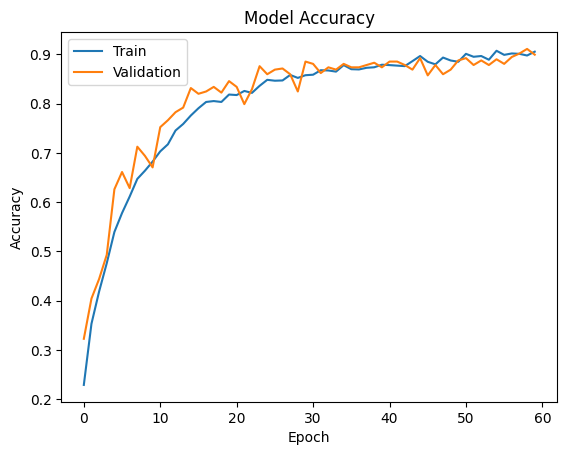

In [451]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

* As we can see from above results, training and validation is giving better accuracy around 90%, let's evaluate the model on test data

##### Evaluate model on test data

In [456]:
test_accuracy1 = model1.evaluate(X_test_normalized, y_test_encoded, verbose=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9021 - loss: 0.3532


* As we can see model 1 is giving around 90% accuray on traning and validation set and also 90% test accuracy.
* Model is generalizing well

##### Generating predictions on test data

In [453]:
y_pred = model1.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


##### Plot Confusion matrix 

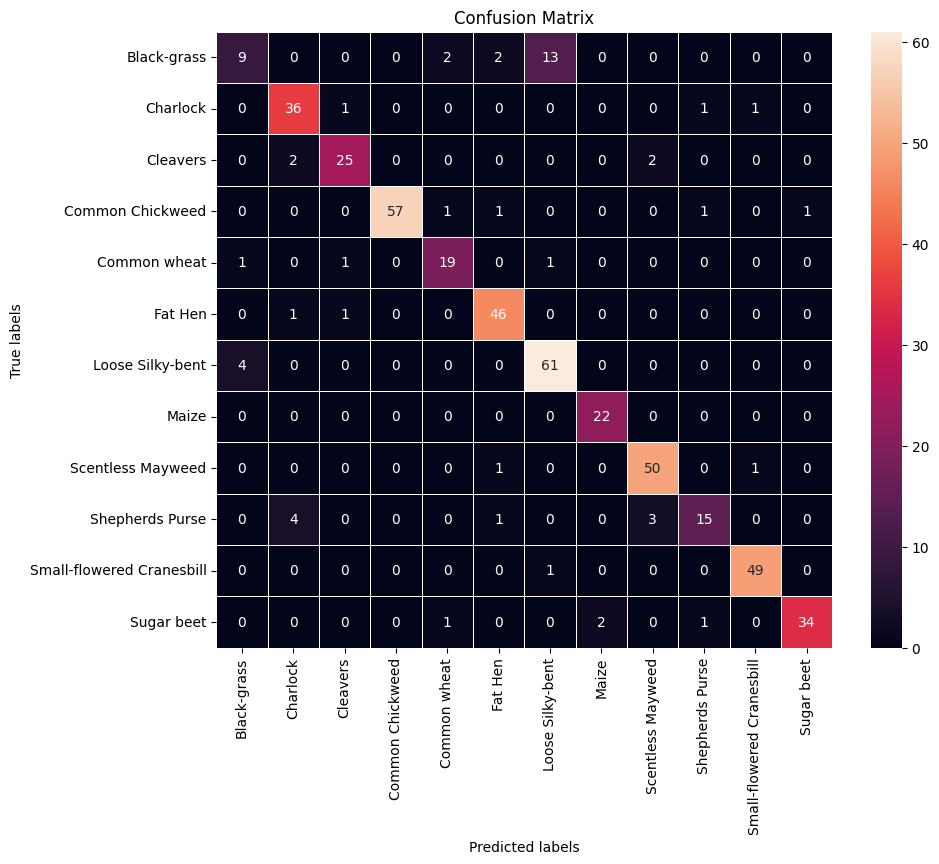

In [454]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(lb.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(lb.classes_),rotation=0)
plt.show()


* Considering confusion matrix, Model 1 is giving better predictions for Common Chickweed, Maize, Small-flowered Cranesbill,Scentless Mayweed, Fat hen
* Model has given misclassified predictions on Black grass, seems it confusing Black grass with Loose Silky-bent, also some wrong predictions for Loose Silky-bent as black grass

In [455]:
# Plotting Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_arg, y_pred_arg, target_names=list(lb.classes_)))

                           precision    recall  f1-score   support

              Black-grass       0.64      0.35      0.45        26
                 Charlock       0.84      0.92      0.88        39
                 Cleavers       0.89      0.86      0.88        29
         Common Chickweed       1.00      0.93      0.97        61
             Common wheat       0.83      0.86      0.84        22
                  Fat Hen       0.90      0.96      0.93        48
         Loose Silky-bent       0.80      0.94      0.87        65
                    Maize       0.92      1.00      0.96        22
        Scentless Mayweed       0.91      0.96      0.93        52
          Shepherds Purse       0.83      0.65      0.73        23
Small-flowered Cranesbill       0.96      0.98      0.97        50
               Sugar beet       0.97      0.89      0.93        38

                 accuracy                           0.89       475
                macro avg       0.87      0.86      0.86    

##### Comments

* Recall is low for Black-grass and except Shepherds Purse, for other classes recall is above 90%
* Precision is slighly low for Black grass but all other classes have good preicision and f1 score
* Even from confusion matrix, we see model did not perform well for black grass
* Overall accuracy is good, let's check if we can improve further


### Model 2 - Model with Reducing Learning Rate & Data Augmentation

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [457]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [458]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [459]:
# set the rotation_range to 20
train_datagen1 = ImageDataGenerator(rotation_range=20,  # randomly rotate images in the range
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )

In [460]:
# Initializing a sequential model
# Initializing a sequential model
model2 = Sequential()

# Adding first conv layer with 128 filters and Kernel size 3*3, padding 'same'
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2)))

# Add two convolution and max-pooling layers activation = relu
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 148,428 (579.80 KB)

 Trainable params: 147,916 (577.80 KB)

 Non-trainable params: 512 (2.00 KB)

##### Fitting the model

In [461]:
# fit the model on train data with batch_size=64 and epochs=30
epochs = 50
batch_size = 32

history = model2.fit(train_datagen.flow(X_train_normalized, y_train_encoded, seed=42, shuffle=True),
                                       epochs=epochs,
                                       batch_size=batch_size,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.2576 - loss: 2.3839 - val_accuracy: 0.0467 - val_loss: 5.1001 - learning_rate: 0.0010
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4375 - loss: 1.6614 - val_accuracy: 0.0467 - val_loss: 5.1101 - learning_rate: 0.0010
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.5388 - loss: 1.3733 - val_accuracy: 0.0935 - val_loss: 5.9076 - learning_rate: 0.0010
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7500 - loss: 0.8170 - val_accuracy: 0.0935 - val_loss: 5.9096 - learning_rate: 0.0010
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.6419 - loss: 1.0307 - val_accuracy: 0.0771 - val_loss: 6.7895 - learning_rate: 0.0010
Epoch 6/50
  1/120 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.6250 - loss: 1.1705
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6250 - loss: 

##### Plot Accuracy Graph

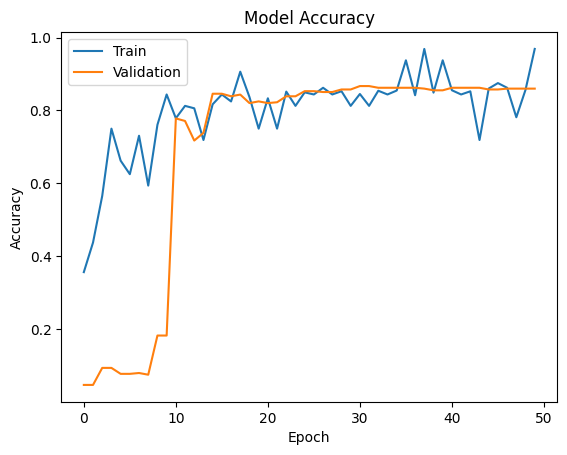

In [462]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

* As we can see the accuracy has been improved with data augmentation compare to earlier model 

##### Evaluate the model on test data

In [463]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 22ms/step - accuracy: 0.8505 - loss: 0.4334


##### Generating the predictions for test data

In [464]:
# Here we would get the output as probablities for each category
y_pred=model2.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


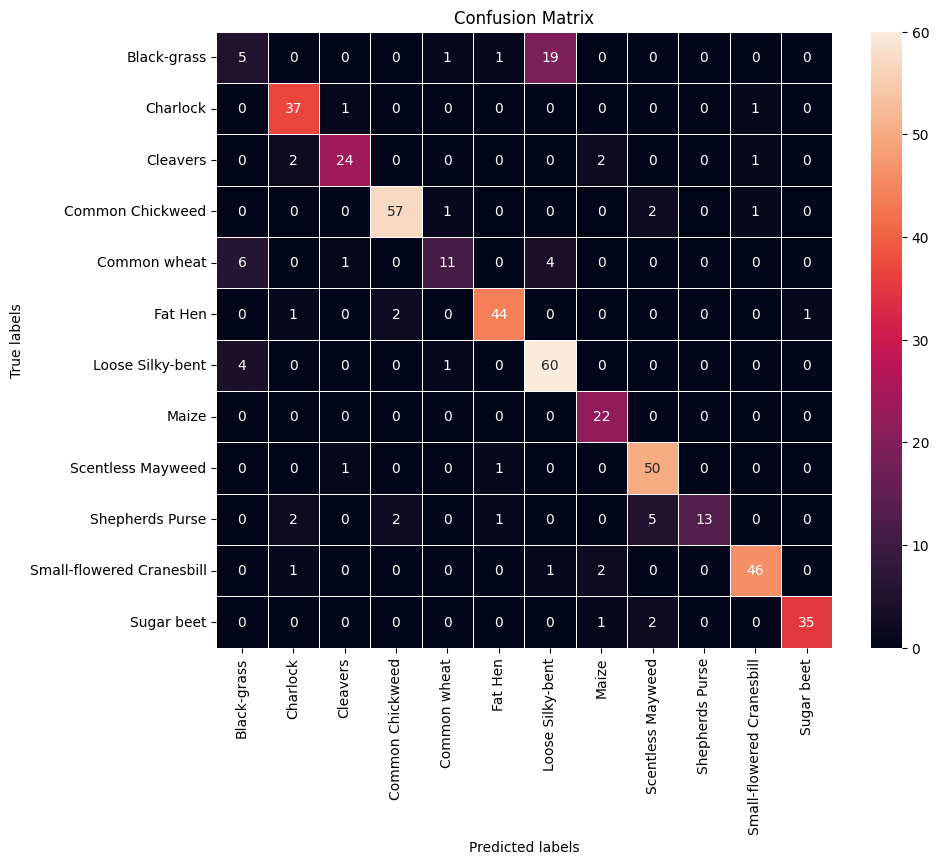

In [465]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(lb.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(lb.classes_),rotation=0)
plt.show()

In [466]:
# Plotting Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_arg, y_pred_arg, target_names=list(lb.classes_)))

                           precision    recall  f1-score   support

              Black-grass       0.33      0.19      0.24        26
                 Charlock       0.86      0.95      0.90        39
                 Cleavers       0.89      0.83      0.86        29
         Common Chickweed       0.93      0.93      0.93        61
             Common wheat       0.79      0.50      0.61        22
                  Fat Hen       0.94      0.92      0.93        48
         Loose Silky-bent       0.71      0.92      0.81        65
                    Maize       0.81      1.00      0.90        22
        Scentless Mayweed       0.85      0.96      0.90        52
          Shepherds Purse       1.00      0.57      0.72        23
Small-flowered Cranesbill       0.94      0.92      0.93        50
               Sugar beet       0.97      0.92      0.95        38

                 accuracy                           0.85       475
                macro avg       0.84      0.80      0.81    

* The test accuracy of the model is around 85% which is less than earlier model
* Recall of brack grass is also reduced so
* Overall model performance is less than earlier model

### Model 3 - Using VGG16 architecture

In [472]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (128,128,3))
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [473]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [474]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(layers.BatchNormalization())
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))

new_model.add(layers.BatchNormalization())
new_model.add(Dense(16, activation='relu'))

new_model.add(Dense(12, activation='softmax'))
opt=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8192)                │          32,768 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,010,492 (57.26 MB)

 Trainable params: 279,356 (1.07 MB)

 Non-trainable params: 14,731,136 (56.19 MB)

In [475]:
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.0001, restore_best_weights=True)

In [476]:
# Epochs
epochs = 50
# Batch size
batch_size = 32

history_vgg16 = new_model.fit(train_datagen1.flow(X_train_normalized, y_train_encoded,
                                       seed=42,
                                       shuffle=True),
                    epochs=epochs,
                    batch_size=batch_size,         
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1,callbacks=[callback_es])

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 69s 563ms/step - accuracy: 0.2206 - loss: 2.2362 - val_accuracy: 0.4813 - val_loss: 1.9825
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.4375 - loss: 1.6743 - val_accuracy: 0.4836 - val_loss: 1.9779
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 69s 577ms/step - accuracy: 0.4755 - loss: 1.6552 - val_accuracy: 0.6332 - val_loss: 1.5963
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.5938 - loss: 1.3362 - val_accuracy: 0.6355 - val_loss: 1.5940
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 70s 582ms/step - accuracy: 0.5722 - loss: 1.4546 - val_accuracy: 0.6682 - val_loss: 1.3327
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.5312 - loss: 1.4326 - val_accuracy: 0.6706 - val_loss: 1.3305
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 70s 583ms/step - accuracy: 0.6226 - loss: 1.3176 - val_accuracy: 0.7033 - val_loss: 1.1366
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.8438 - loss: 1.0012 - 

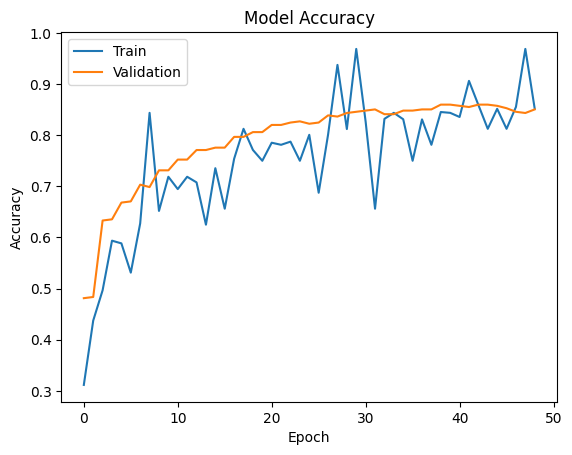

In [477]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [479]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 459ms/step - accuracy: 0.8599 - loss: 0.4553


As VGG16 models does not perform better than earlier model, let's skip the furthern evalution of model on test data

## Final Model

In [480]:
pd.DataFrame({'Models':['Model 0 - Base Model with CNN layers','Model 1 - Data Augmentation and Callback ','Model 2 -Data Augmentation and Reducing learning rate', 'Model 3 - Transfer learning with VGG16 architecture'],'Train Accuracy':['89%','91%','96%','85%'],'Validation Accuracy':['89%','90%','86%','85%'],'Test Accuracy':['88%','90%','85%','86%']})

Models Train Accuracy  \
0               Model 0 - Base Model with CNN layers            89%   
1          Model 1 - Data Augmentation and Callback             91%   
2  Model 2 -Data Augmentation and Reducing learni...            96%   
3  Model 3 - Transfer learning with VGG16 archite...            85%   

  Validation Accuracy Test Accuracy  
0                 89%           88%  
1                 90%           90%  
2                 86%           85%  
3                 85%           86%

* Considering the accuracy of all above models. 'Model 1 - Data Augementation and Callback' gives better accuracy score for train, validation and test sets i.e. around 90% accuracy, so will go ahead with Model 1 as best model. 
* Let's visualize and predict the test data samples using Model 1

### Visualizing the prediction

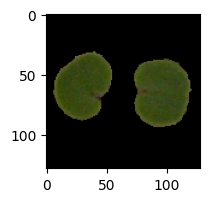

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


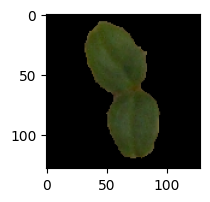

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Label ['Cleavers']
True Label Cleavers


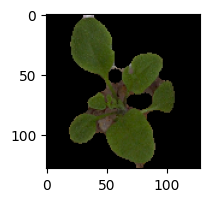

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [486]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', lb.inverse_transform(model1.predict((X_test_normalized[2].reshape(1,128,128,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', lb.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', lb.inverse_transform(model1.predict((X_test_normalized[33].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', lb.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', lb.inverse_transform(model1.predict((X_test_normalized[36].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', lb.inverse_transform(y_test_encoded)[36]) 

###  Conclusion:

*  As we can see from predictions model has predicted all 3 random classes correctly. With some changes the parameters model may perform better. 
*  We have built a CNN-model to predict the class of a plant, which works quite well. (Increasing number of epochs and/or adding layers to a model can even increase the performance)

* CNN with Batch Normalization, Maxpooling, dropouts + Dense layers is a good combination for image classification

## Actionable Insights and Business Recommendations

#### Actionable Insights

* Analyze classification accuracy and confusion matrix to identify misclassified seedling classes.
* Models can be further improved by training on different parameters and find better optimized combination of parameters
* Assess dataset balance and image quality to address potential biases and improve model training.
* Evaluate prediction speed for suitability in real-time applications.
* Incorporate active learning and retraining with new data to enhance model robustness. 
* With better computational resources models can be further trained and improved on better image quality or larger sizes.
* Different transfer learning achitectures can be used and train to check for better results
* Model can be further improved by different sets of data augementation sets/combinations
  

#### Business Recommendations

* Companies can gather more data for various variety of seedlings to improve model performance.
* Precision Agriculture: Use the model for automated weed detection, crop monitoring, and early disease identification.
* Cost Optimization: Automate labor-intensive tasks like seedling identification to save costs and resources.
* Product Development: Create a mobile app for instant seedling classification and care advice.
* Revenue Streams: Offer subscription services for advanced features and license anonymized data for research.
* Partnerships: Collaborate with agricultural bodies and seed companies to tailor and scale the solution.
* Custom Solutions for Seed Companies:Partner with seed companies to customize the CNN model for their proprietary seed varieties, offering them a competitive edge.

_____